In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import seaborn as sns
import plotly.express as px

In [14]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.drop('RowNumber', axis=1, inplace=True)

### Задание 9.1.
#### Каково соотношение ушедших и лояльных клиентов?

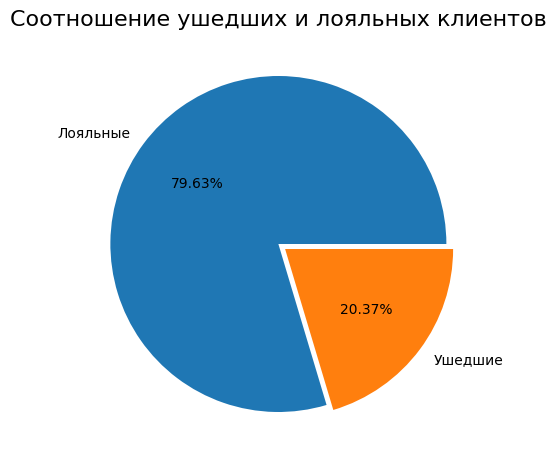

In [15]:
churn_data['Exited'] = churn_data['Exited'].apply(lambda x: 'Ушедшие' if x == 1 else 'Лояльные')
exited_clients = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(6, 6))
axes = fig.add_axes([0.3, 0.3, 0.7, 0.7])
axes.pie(
    exited_clients,
    labels=exited_clients.index,
    autopct='%.2f%%',
    explode=[0, 0.05]
);
axes.set_title('Соотношение ушедших и лояльных клиентов', fontsize=16);

Процент ушедших клиентов меньше процента лояльных, но всё равно является достаточно большим

### Задание 9.2.
#### Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. 

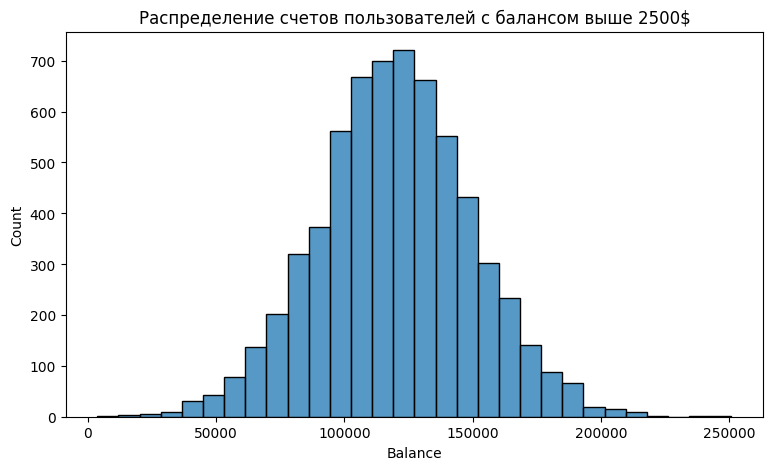

In [16]:
fig = plt.figure(figsize=(9, 5))
balance_df = churn_data[churn_data['Balance'] > 2500]
axes = sns.histplot(
    data=balance_df,
    x='Balance',
    bins=30
);
axes.set_title('Распределение счетов пользователей с балансом выше 2500$');

По данной гистограмме можно заметить, что в основном пользователи имеют на счетах от 100 000 до 150 000 долларов.
Аномалий не обнаружено, распределение нормальное

### Задание 9.3.
#### Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов?

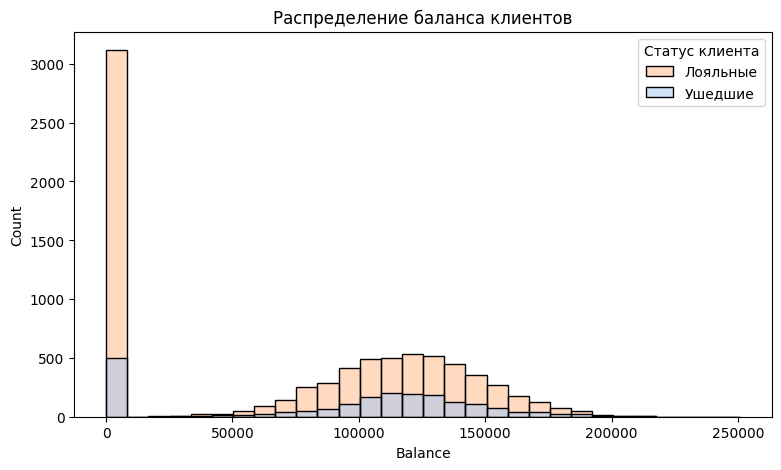

In [17]:
fig = plt.figure(figsize=(9, 5))
axes = sns.histplot(
    data=churn_data,
    x='Balance',
    bins=30,
    hue='Exited',
    palette='pastel',
);
axes.legend(title='Статус клиента', labels=['Лояльные', 'Ушедшие']);
axes.set_title('Распределение баланса клиентов');

Гистограмма показывает, что распределение баланса ушедших и лояльных пользоваетелей практически идентичны друг другу, поэтому по количеству денег на счете не получится понять причину ухода из банка

### Задание 9.4.
#### Посмотрите на распределение возраста в разрезе признака оттока. 

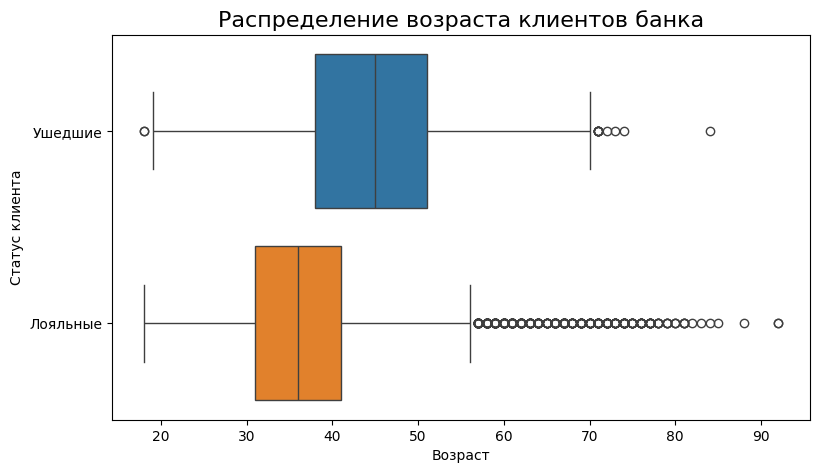

In [18]:
fig = plt.figure(figsize=(9, 5))
axes = sns.boxplot(
    data=churn_data,
    x='Age',
    y='Exited',
    hue='Exited',
    orient='h',
    width=0.8
);
axes.set_title('Распределение возраста клиентов банка', fontsize=16);
axes.set_ylabel('Статус клиента');
axes.set_xlabel('Возраст');


Коробчатая диаграмма наглядно показывает, что в основном долю ушедших клиентов составляют люди более старшего возраста. Банку стоит обратить внимание именно на эту возрастную категорию. Так же стоит заметить, что потенциальных выбросов больше в категории лояльных клиентов.

### Задание 9.5.
#### Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты.

In [19]:
churn_data_cr_sal = churn_data.groupby(['CreditScore', 'Exited'], as_index=False)['EstimatedSalary'].mean()
fig = px.scatter(
    data_frame=churn_data_cr_sal,
    x='EstimatedSalary',
    y='CreditScore',
    color='Exited',
    color_discrete_sequence=['orange', 'green'],
    width=1000,
    height=500,
    title='Зависимость крединого рейтинга от предполагаемой заработной платы'
)
fig.update_xaxes(title='Предполагаемая зарплата')
fig.update_yaxes(title='Кредитный рейтинг')
fig.show()

![pic](/pic/scatter.png)

Исходя их диаграммы рассеивания можно заметить, что у ушедших клиентов шире разброс по значениям зп и кредитного рейтинга

### Задание 9.6.
#### Кто чаще уходит, мужчины или женщины?

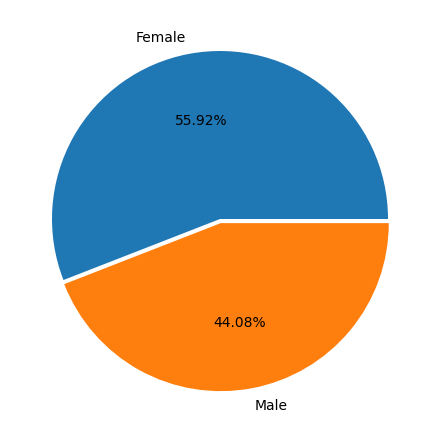

In [20]:
left_gender = churn_data[churn_data['Exited'] == 'Ушедшие']['Gender'].value_counts()

fig = plt.figure(figsize=(6, 6))
axes = fig.add_axes([0.3, 0.3, 0.7, 0.7])
axes.pie(
    left_gender,
    autopct='%.2f%%',
    labels=left_gender.index,
    explode=[0, 0.025]
);


Круговая диаграмма показывает, что чаще уходят женщины

### Задание 9.7.
#### Как отток клиентов зависит от числа приобретённых у банка услуг?

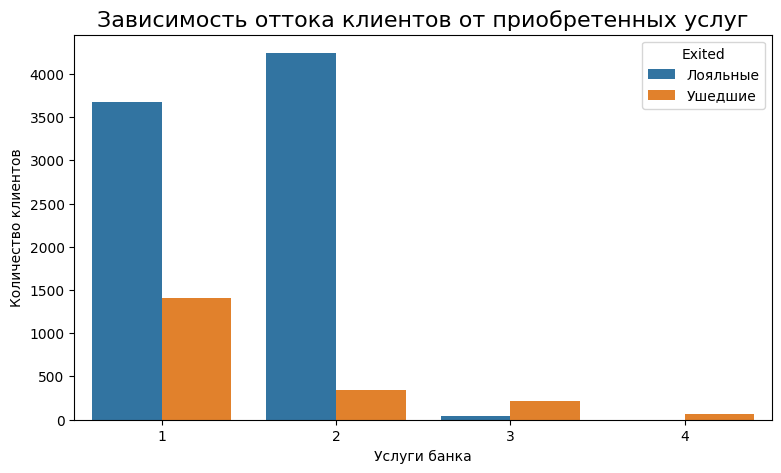

In [21]:
grouped = churn_data.groupby(['NumOfProducts', 'Exited'], as_index=False)['CustomerId'].count()

fig = plt.figure(figsize=(9, 5))
axes = sns.barplot(
    data=grouped,
    x='NumOfProducts',
    y='CustomerId',
    hue='Exited'
);
axes.set_title('Зависимость оттока клиентов от приобретенных услуг', fontsize=16)
axes.set_ylabel('Количество клиентов')
axes.set_xlabel('Услуги банка');

Мы можем наблюдать, что лояльные клиенты приобретают себе 2 услуги банка, однако 4 услуги подключали только те, кто в последствии прекратили пользоваться этим замечательным банком. Из этого следует вывод, что некоторые услуги могут стать причиной оттока клиентов

### Задание 9.8.
#### Как влияет наличие статуса активного клиента на отток клиентов?

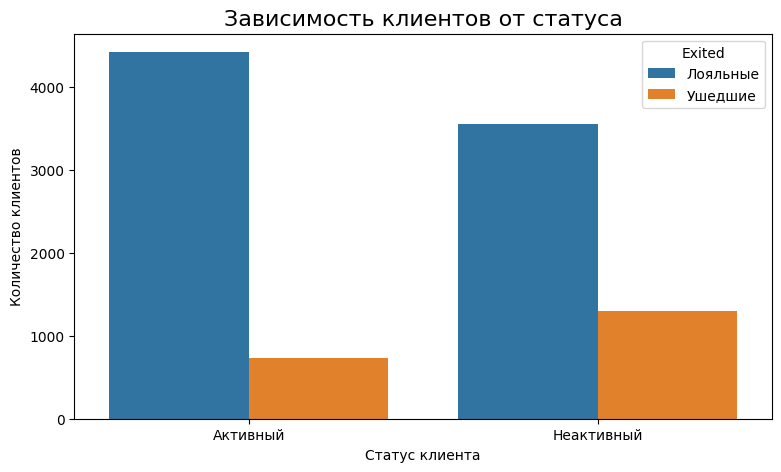

In [22]:
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].apply(lambda x: 'Активный' if x == 1 else 'Неактивный')
grouped1 = churn_data.groupby(['IsActiveMember', 'Exited'], as_index=False)['CustomerId'].count()

fig = plt.figure(figsize=(9, 5))
axes = sns.barplot(
    data=grouped1,
    x='IsActiveMember',
    y='CustomerId',
    hue='Exited'
);
axes.set_title('Зависимость клиентов от статуса', fontsize=16)
axes.set_xlabel('Статус клиента')
axes.set_ylabel('Количество клиентов');


Неактивных ушедших пользователей больше чем активных. Для удержания клиентов банк может предложить неактивным клиентам различные программы лояльности, кешбек и т.д.

### Задание 9.9.
#### В какой стране доля ушедших клиентов больше? 

In [23]:
churn_data['Exited'] = churn_data['Exited'].apply(lambda x: 1 if x == 'Ушедшие' else 0)
choropleth_data = churn_data.groupby(['Geography'], as_index=False)['Exited'].mean()

fig = px.choropleth(
    data_frame=choropleth_data,
    color='Exited',
    locations='Geography',
    locationmode='country names',
    range_color=[0, 0.35],
    color_continuous_scale='Reds'
)
fig.show()

![pic](/pic/worldmap.png)

Стоит заметить, что доля ушедших пользователей в Германии в 2 раза больше других стран. Так как в Германии больше всего банков в сравнении с Испанией и Францией, то это может означать большую конкуренцию, вследствие которой клиенты уходят в более выгодные им банки

### Задание 9.10.
#### Постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

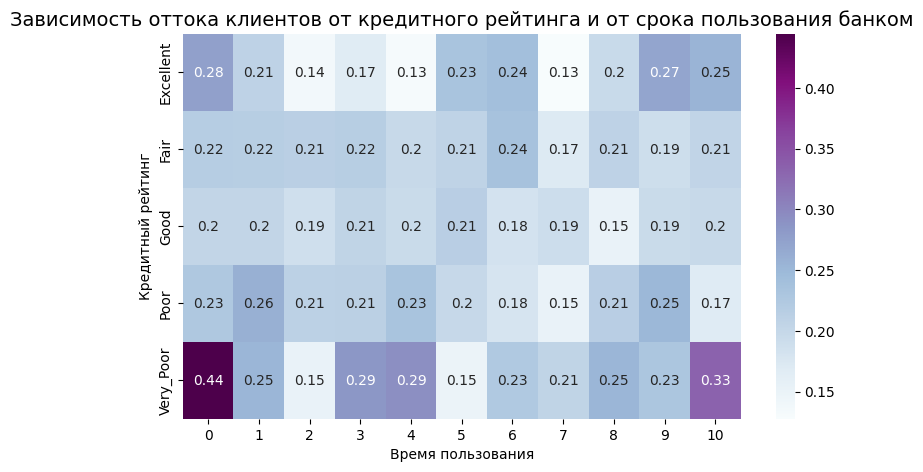

In [24]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
pivot = churn_data.pivot_table(
    columns='Tenure',
    index='CreditScoreCat',
    values='Exited',
)

fig = plt.figure(figsize=(9, 5))
axes = sns.heatmap(
    data=pivot,
    annot=True,
    cmap='BuPu'
)
axes.set_title('Зависимость оттока клиентов от кредитного рейтинга и от срока пользования банком', fontsize=14);
axes.set_ylabel('Кредитный рейтинг');
axes.set_xlabel('Время пользования');

Исходя из данной тепловой карты видно, что больше всего ушедших пользователей приходится на клиентов с низким уровнем кредитного рейтига. Банку стоит ориентироваться на эту категорию и предложить им более выгодные условия, дабы избежать их большего оттока.